# Building a Classifier for MNIST with K-Nearest Neighbors (KNN) and Hyperparameter Tuning


In this notebook, we will:
1. Prepare the MNIST dataset and train a K-Nearest Neighbors (KNN) classifier.
2. Use Grid Search to optimize key hyperparameters, such as `n_neighbors` and `weights`.
3. Evaluate the KNN model on the test set and ensure the accuracy target of 97% is met.
4. Compare performance against other classifiers like SGD and Random Forest.


# Prepare the MNIST dataset and train a K-Nearest Neighbors (KNN) classifier

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Separate features and labels
X, y = mnist['data'], mnist['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn_clf = KNeighborsClassifier()

# Use Grid Search to optimize key hyperparameters, such as `n_neighbors` and `weights`.

In [4]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid to search
knn_clf_param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance']
}

# Train the KNN model using grid search
knn_clf_grid_search = GridSearchCV(knn_clf, knn_clf_param_grid, cv=3, verbose=3)
knn_clf_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  41.2s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  36.5s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  34.0s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  34.4s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  33.6s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  33.5s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  41.5s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  42.0s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  41.1s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.971 total time=  40.0s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  39.2s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [5]:
knn_clf_grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [6]:
knn_clf_grid_search.best_score_

0.9703500000000002

# Evaluate the KNN model on the test set and ensure the accuracy target of 97% is met

In [7]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the best model
y_test_pred_knn = knn_clf_grid_search.predict(X_test)

# Calculate the accuracy on the test set
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn)
knn_test_accuracy

0.9714

In [8]:
from sklearn.metrics import confusion_matrix

conf_mx_knn = confusion_matrix(y_test, y_test_pred_knn)
conf_mx_knn

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]],
      dtype=int64)

# Compare performance against other classifiers like SGD and Random Forest

## Stochastic Gradient Descent

In [9]:
from sklearn.linear_model import SGDClassifier

# Train and evaluate an SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid to search
sgd_clf_param_grid = {
    'max_iter': [1000, 15000],
    'tol': [1e-2, 1e-3]
}

# Train the KNN model using grid search
sgd_clf_grid_search = GridSearchCV(sgd_clf, sgd_clf_param_grid, cv=3, verbose=3)
sgd_clf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...........max_iter=1000, tol=0.01;, score=0.874 total time= 1.7min
[CV 2/3] END ...........max_iter=1000, tol=0.01;, score=0.858 total time= 1.5min
[CV 3/3] END ...........max_iter=1000, tol=0.01;, score=0.868 total time= 1.5min
[CV 1/3] END ..........max_iter=1000, tol=0.001;, score=0.874 total time= 1.8min
[CV 2/3] END ..........max_iter=1000, tol=0.001;, score=0.858 total time= 1.5min
[CV 3/3] END ..........max_iter=1000, tol=0.001;, score=0.869 total time= 1.5min
[CV 1/3] END ..........max_iter=15000, tol=0.01;, score=0.874 total time= 1.8min
[CV 2/3] END ..........max_iter=15000, tol=0.01;, score=0.858 total time= 1.5min
[CV 3/3] END ..........max_iter=15000, tol=0.01;, score=0.868 total time= 1.5min
[CV 1/3] END .........max_iter=15000, tol=0.001;, score=0.874 total time= 1.8min
[CV 2/3] END .........max_iter=15000, tol=0.001;, score=0.858 total time= 1.5min
[CV 3/3] END .........max_iter=15000, tol=0.001;,

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=42),
             param_grid={'max_iter': [1000, 15000], 'tol': [0.01, 0.001]},
             verbose=3)

In [11]:
sgd_clf_grid_search.best_params_

{'max_iter': 1000, 'tol': 0.001}

In [12]:
sgd_clf_grid_search.best_score_

0.8669666666666668

In [13]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the best model
y_test_pred_sgd = sgd_clf_grid_search.predict(X_test)

# Calculate the accuracy on the test set
sgd_test_accuracy = accuracy_score(y_test, y_test_pred_sgd)
sgd_test_accuracy

0.874

In [14]:
from sklearn.metrics import confusion_matrix

conf_mx_sgd = confusion_matrix(y_test, y_test_pred_sgd)
conf_mx_sgd

array([[ 902,    0,    8,   11,    1,   13,    2,    4,   39,    0],
       [   0, 1095,    2,    3,    0,    2,    4,    1,   28,    0],
       [   1,   10,  803,   69,    6,    4,    4,   10,  122,    3],
       [   0,    1,    6,  931,    1,   21,    3,    7,   35,    5],
       [   2,    2,    9,   15,  778,    4,    2,    9,   62,   99],
       [   6,    2,    1,   71,    3,  709,   12,   12,   67,    9],
       [   5,    3,   12,   13,    5,   21,  854,    0,   45,    0],
       [   0,    3,   18,   20,    3,    4,    1,  919,   18,   42],
       [   3,    5,    2,   30,    4,   43,    5,    5,  872,    5],
       [   3,    5,    2,   33,    7,    5,    0,   20,   57,  877]],
      dtype=int64)

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

In [16]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid to search
rf_clf_param_grid = {
    'n_estimators': [50, 100, 150]
}

# Train the KNN model using grid search
rf_clf_grid_search = GridSearchCV(rf_clf, rf_clf_param_grid, cv=3, verbose=3)
rf_clf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ...................n_estimators=50;, score=0.962 total time=  16.3s
[CV 2/3] END ...................n_estimators=50;, score=0.960 total time=  17.5s
[CV 3/3] END ...................n_estimators=50;, score=0.965 total time=  21.8s
[CV 1/3] END ..................n_estimators=100;, score=0.965 total time=  41.3s
[CV 2/3] END ..................n_estimators=100;, score=0.963 total time=  36.5s
[CV 3/3] END ..................n_estimators=100;, score=0.967 total time=  34.7s
[CV 1/3] END ..................n_estimators=150;, score=0.966 total time=  52.7s
[CV 2/3] END ..................n_estimators=150;, score=0.964 total time=  50.9s
[CV 3/3] END ..................n_estimators=150;, score=0.967 total time=  52.5s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [50, 100, 150]}, verbose=3)

In [17]:
rf_clf_grid_search.best_params_

{'n_estimators': 150}

In [18]:
rf_clf_grid_search.best_score_

0.9655666666666667

In [19]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the best model
y_test_pred_rf = rf_clf_grid_search.predict(X_test)

# Calculate the accuracy on the test set
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
rf_test_accuracy

0.9707

In [20]:
from sklearn.metrics import confusion_matrix

conf_mx_rf = confusion_matrix(y_test, y_test_pred_rf)
conf_mx_rf

array([[ 971,    0,    0,    0,    0,    2,    3,    1,    3,    0],
       [   0, 1126,    2,    2,    0,    1,    2,    0,    1,    1],
       [   6,    0, 1002,    5,    3,    0,    3,    8,    5,    0],
       [   1,    0,    9,  972,    0,   10,    0,    8,    7,    3],
       [   1,    0,    1,    0,  956,    0,    4,    1,    4,   15],
       [   3,    0,    1,   10,    2,  862,    6,    2,    5,    1],
       [   7,    3,    1,    0,    2,    4,  937,    0,    4,    0],
       [   1,    4,   17,    2,    1,    0,    0,  992,    2,    9],
       [   4,    0,    6,    8,    3,    5,    5,    3,  932,    8],
       [   9,    6,    2,   14,   12,    2,    0,    4,    3,  957]],
      dtype=int64)

## Results

In [21]:
# Display the results
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")
print(f"SGD Test Accuracy: {sgd_test_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

KNN Test Accuracy: 0.9714
SGD Test Accuracy: 0.8740
Random Forest Test Accuracy: 0.9707


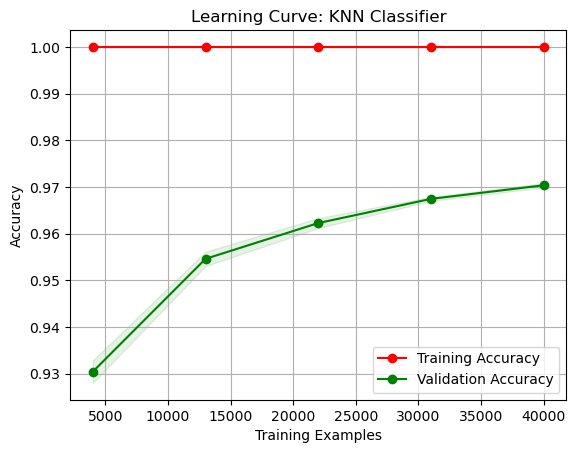

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    
    # Get the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="accuracy"
    )
    
    # Compute the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    # Plot the learning curves with the confidence interval (standard deviation)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")

    plt.legend(loc="best")
    return plt

# Generate learning curves for the KNN Classifier
knn_clf_plot = KNeighborsClassifier(weights='distance', n_neighbors=4)
plot_learning_curve(knn_clf_plot, "Learning Curve: KNN Classifier", X_train, y_train, cv=3)
plt.show()

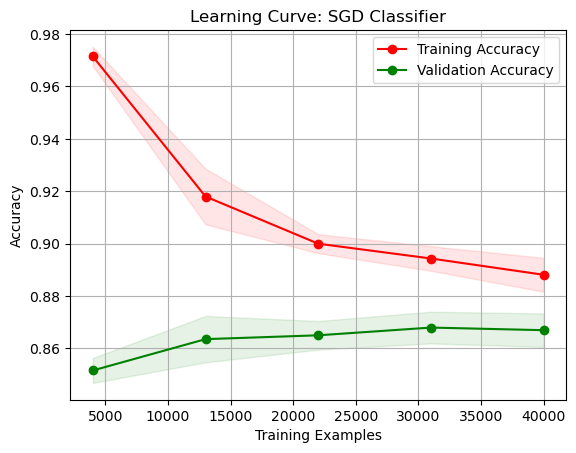

In [23]:
# Generate learning curves for the SGD Classifier
sgd_clf = SGDClassifier(max_iter = 1000, tol = 0.001, random_state=42)
plot_learning_curve(sgd_clf, "Learning Curve: SGD Classifier", X_train, y_train, cv=3)
plt.show()

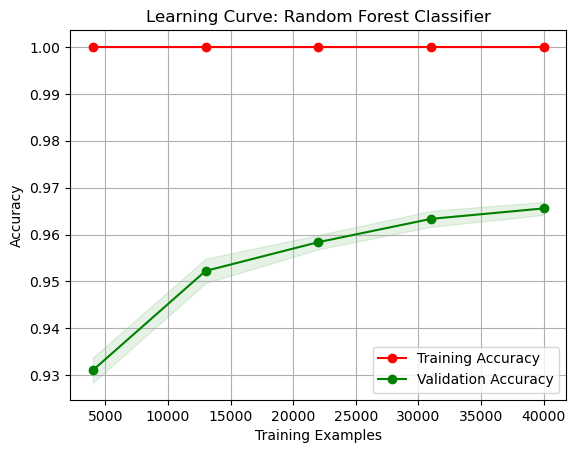

In [24]:
# Generate learning curves for the Random Forest Classifier
rf_clf_plot = RandomForestClassifier(n_estimators = 150, random_state=42)
plot_learning_curve(rf_clf_plot, "Learning Curve: Random Forest Classifier", X_train, y_train, cv=3)
plt.show()

In [25]:
# Generate learning curves for the Random Forest Classifier
rf_clf_plot = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 50, n_estimators = 1000, random_state=42)
plot_learning_curve(rf_clf_plot, "Learning Curve: Random Forest Classifier", X_train, y_train, cv=3)
plt.show()